The molecule inserted looks like this:


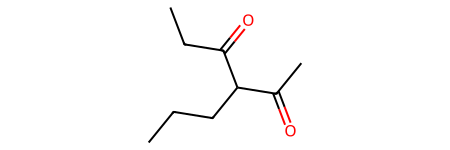

--------------------------------------
--------------------------------------
C(sp3)-C(sp3) bond disconnection available in alpha position of 1,3-dicarbonyl compound
--------------------------------------
Option 1
Reactant 1


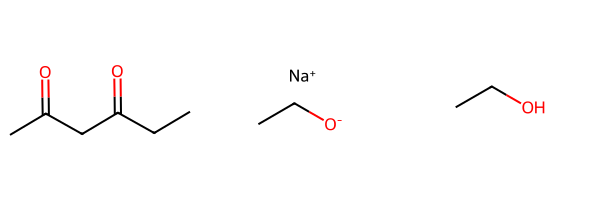

Reactant 2


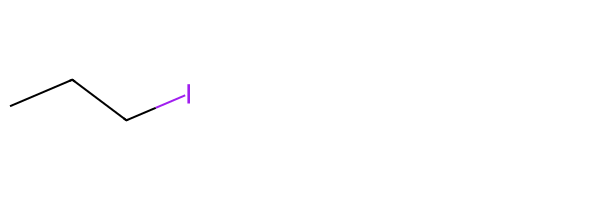

--------------------------------------
--------------------------------------
C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound
--------------------------------------
Option 1
Reactant 1


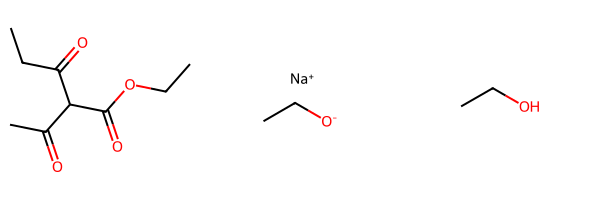

Reactant 2


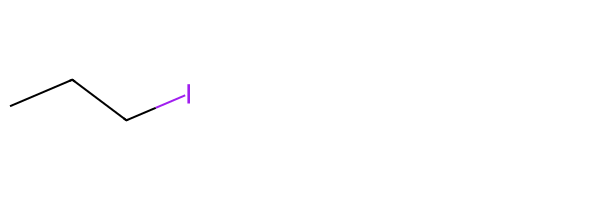

Once the two reactants are combined, the following product is obtained


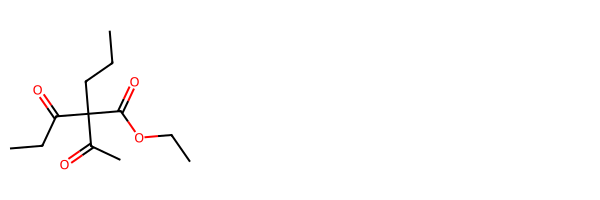

This product needs to be hydrolyzed using NaOH, then quenched using an acid, and finally heated in order to obtain the target molecule
--------------------------------------


In [184]:
from rdkit import Chem
from itertools import chain
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

def unique_list_reactants (reactants_tuple: tuple) -> float:
    '''
    A tuple of tuples, containing the reactants (as Mol objects) needed to form the target molecule is received.
    This function returns a list of unique lists of the reactants (as Mol objects),
    accounting for the symmetry of the molecule.
    '''
    reactants_list = []
    for r in reactants_tuple:   #The tuple of tuples is transformed into a list of lists
        rxn_site = []           #of reactants (as String objects, using SMILES)
        for molecule in r:
            rxn_site.append(Chem.MolToSmiles(molecule))
        reactants_list.append(rxn_site)
    reactants_set = {tuple(r) for r in reactants_list} #The list is transformed in a set of tuples, to have unique elements
    reactants_list_unique = [list(r) for r in reactants_set] #The set of tuples is trnasformed into a list of unique lists
    reactants_unique_mol = []
    for r in reactants_list_unique: #Here, the list of unique list of reactants (as Mol objects) is created
        mols = []
        for smiles in r:
            mols.append(Chem.MolFromSmiles(smiles))
        reactants_unique_mol.append(mols)
    return reactants_unique_mol
    
def alpha_monocarbonyl_alkylation (mol: Chem.rdchem.Mol):
    iodine = Chem.MolFromSmiles('I')
    sodium_ethoxide = Chem.MolFromSmiles('[Na+].[O-]CC')
    ethanol = Chem.MolFromSmiles('CCO')
    ethyl_fumarate = Chem.MolFromSmiles('C(=O)OCC')
    print (f"C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound")
    print (f"--------------------------------------")
    rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[CH:3][C^3:4].[C:5](=[O:6])[O:7][C:8][C:9].[I:10]>>[C:1](=[O:2])[C:3][C:5](=[O:6])[O:7][C:8][C:9].[C:4][I:10]')
    reactants = unique_list_reactants(rxn.RunReactants((mol,ethyl_fumarate,iodine)))
    opt = 1
    for r in reactants:
        print (f"Option {opt}")
        reactant_1 = [r[0], sodium_ethoxide, ethanol]
        reactant_2 = [r[1]]
        print (f"Reactant 1")
        display(Draw.MolsToGridImage(reactant_1))
        print (f"Reactant 2")
        display(Draw.MolsToGridImage(reactant_2))
        opt += 1
        print (f"Once the two reactants are combined, the following product is obtained")
        rxn_intermediate = AllChem.ReactionFromSmarts('[C:1][C:2][O:3][C:4](=[O:5])[C:6].[I:7][C:8]>>[C:1][C:2][O:3][C:4](=[O:5])[C:6][C:8].[I:7]')
        product_intermediate = unique_list_reactants(rxn_intermediate.RunReactants((r[0],r[1])))
        display(Draw.MolsToGridImage([product_intermediate[0][0]]))
        print (f"This product needs to be hydrolyzed using NaOH, then quenched using an acid, and finally heated"
               f" in order to obtain the target molecule")
        print (f"--------------------------------------")

def alpha_monocarbonyl_alkylation_tetrasubstituted (mol: Chem.rdchem.Mol):
    triethyl_amine = Chem.MolFromSmiles('CCN(CC)CC')
    iodine = Chem.MolFromSmiles('I')
    rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[C:3]([C^3:4])([C^3:5])[C^3:6].[I:7]>>[C:1](=[O:2])[C:3]([C^3:4])[C^3:6].[C:5][I:7]')
    reactants = unique_list_reactants(rxn.RunReactants((mol,iodine)))
    opt = 1
    for r in reactants:
        print (f"Option {opt}")
        reactant_1 = [r[0], triethyl_amine]
        reactant_2 = [r[1]]
        opt += 1
        print (f"Reactant 1")
        display(Draw.MolsToGridImage(reactant_1))
        print (f"Reactant 2")
        display(Draw.MolsToGridImage(reactant_2))
        print (f"--------------------------------------")

def alpha_dicarbonyl_alkylation (mol: Chem.rdchem.Mol):
    iodine = Chem.MolFromSmiles('I')
    sodium_ethoxide = Chem.MolFromSmiles('[Na+].[O-]CC')
    ethanol = Chem.MolFromSmiles('CCO')
    ethyl_fumarate = Chem.MolFromSmiles('C(=O)OCC')
    print (f"C(sp3)-C(sp3) bond disconnection available in alpha position of 1,3-dicarbonyl compound")
    print (f"--------------------------------------")
    rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[C^3:3]([C^3:4])[C:5]=[O:6].[I:7]>>[C:1](=[O:2])[C:3][C:5]=[O:6].[C:4][I:7]')
    reactants = unique_list_reactants(rxn.RunReactants((mol,iodine)))
    opt = 1
    for r in reactants:
        print (f"Option {opt}")
        reactant_1 = [r[0], sodium_ethoxide, ethanol]
        reactant_2 = [r[1]]
        print (f"Reactant 1")
        display(Draw.MolsToGridImage(reactant_1))
        print (f"Reactant 2")
        display(Draw.MolsToGridImage(reactant_2))
        opt += 1
        print (f"--------------------------------------")
    print (f"--------------------------------------")

def C_S_disconnection (mol: Chem.rdchem.Mol) ->int:
    '''
    The function receives a mol object and verrifes if a C(sp3 hybridized)-S bond is present
    If yes, the reactants from which the bond could be formed: 
    an alkyl iodide and a thiol in the presence of potassium carbonate are displayed and 1 is returned
    If the sulfur atom is bonded to two C(sp3 hybridized) atoms, 
    there are two possible disconnections for each S atom.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the bond is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][S]')): #Verifies if the C(sp3 hybridized)-S is present
        print (f"C(sp3)-S disconection available")
        print (f"--------------------------------------")
        iodine_smiles = 'I'
        potassium_carbonate_smiles ='C(=O)([O-])[O-].[K+].[K+]'
        iodine = Chem.MolFromSmiles(iodine_smiles)
        potassium_carbonate = Chem.MolFromSmiles(potassium_carbonate_smiles)
        rxn = AllChem.ReactionFromSmarts('[C^3:1][S:2].[I:3]>>[C:1][I:3].[S:2]') #Searches for the bond pattern and returns reactants
        reactants = unique_list_reactants(rxn.RunReactants((mol,iodine )))       #to make the bond in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form C(sp3 hybridized)-S bonds
        for r in reactants: #Prints the reactants
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1], potassium_carbonate]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print(f"--------------------------------------")
        return 1
    return 0
    
def ester_disconnection (mol: Chem.rdchem.Mol) ->int:
    '''
    The function receives a mol object and verrifes if an ester functional group is present
    If yes, the reactants from which the ester could be formed: 
    an alcohol and a carboxylic acid in the presence of strong acid as catalyst are displayed and 1 is returned
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the ester is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^2](=[O])[O][C]')): #Verifies if an ester is present 
        print (f"Ester disconnection available")
        print (f"--------------------------------------")
        proton_smiles = '[H+]'
        proton = Chem.MolFromSmiles(proton_smiles)
        hydroxyl_smile = 'O'
        hydroxyl = Chem.MolFromSmiles(hydroxyl_smile)
        rxn = AllChem.ReactionFromSmarts('[C^2:1](=[O:2])[O:3][C:4].[O:5]>>[C^2:1](=[O:2])[O:5].[O:3][C:4]') #Searches for the ester and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol, hydroxyl))) #reactants to make the ester in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form esters
        for r in reactants: #Prints the reactants and the catalyst
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            catalyst = [proton]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print(f"Catalyst")
            display(Draw.MolsToGridImage(catalyst))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return 1
    return 0

def alcohol_beta_double_bond (mol: Chem.rdchem.Mol) ->int:
    '''
    The function receives a mol object and verrifes if a pattern alcohol beta olefin is present
    If yes, the reactants from which the pattern could be formed: 
    a terminal alkyne in the presence of a strong base and an expoxide are displayed.
    The intermediate product of the synthesis, and the hydrogenation condition to obtain
    the target molecule are also displayed.
    1 is returned.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^2]=[C^2][CH2][C^3][OH]')): #Verifies if the pattern is present
        print (f"Primary alcohol with beta alkene disconnection available")
        print (f"--------------------------------------")
        amide_smiles = '[Na+].[NH2-]' #Starting from here, the SMILES of all the compounds needed are defined, and are
        amide = Chem.MolFromSmiles(amide_smiles) #trnasformed in mol objects.
        hydrogen_smiles = '[H][H]'
        hydrogen = Chem.MolFromSmiles(hydrogen_smiles)
        palladium = Chem.MolFromSmiles('[Pd]')
        calcium_carbonate = Chem.MolFromSmiles('[Ca+2].[O-]C([O-])=O ')
        lead = Chem.MolFromSmiles('[Pb]')
        sodium = Chem.MolFromSmiles('[Na]')
        ammonia = Chem.MolFromSmiles('N')
        t_butanol = Chem.MolFromSmiles('CC(C)(O)C')
        rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2][CH2:3][C^3:4][OH:5]>>[C:1]#[C:2].[C:3]1[C:4][O:5]1') #Searches for the pattern and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol,))) #reactants to make it in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form esters
        for r in reactants: #Prints the reactants
            print(f"Option {opt}")
            reactant_1 = [r[0], amide]
            reactant_2 = [r[1]]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print(f"Once this two are combined, the following product is obtained") #The reactants don't give directly the target molecule, so
            rxn_intermediate = AllChem.ReactionFromSmarts('[C:1]#[CH:2].[CH2:3]1[C:4][O:5]1>>[C:1]#[C:2][C:3][C:4][OH:5]') #the intermediate
            product_intermediate = unique_list_reactants(rxn_intermediate.RunReactants((r[0],r[1]))) #product is found by reacting the reactants
            display(Draw.MolsToGridImage(product_intermediate[0])) #and is displayed
            print (f"The product needs to be hydrogenated in order to get to the target molecule") #Conditions to get target molecule
            print (f"If the Z geometry is needed for the double bond, then the following conditions, known as" 
            f" hydrogen on Lindlar catalyst, are employed")
            display(Draw.MolsToGridImage([hydrogen, palladium, calcium_carbonate, lead], molsPerRow=4 )) #If Z alkene needed
            print (f"If the E geometry is needed for the double bond, then the following conditions are employed")
            display(Draw.MolsToGridImage([sodium, ammonia, t_butanol])) #If E alkene needed
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return 1
    return 0

def alcohol_beta_triple_bond (mol: Chem.rdchem.Mol) ->int:
    '''
    The function receives a mol object and verrifes if a pattern alcohol beta alkyne is present
    If yes, the reactants from which the pattern could be formed: 
    a terminal alkyne in the presence of a strong base and an expoxide are displayed and 1 is returned.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C]#[C][CH2][C^3][OH]')): #Verifies if the pattern is present
        print (f"Primary alcohol with beta alkyne disconnection available")
        print (f"--------------------------------------")
        amide_smiles = '[Na+].[NH2-]' #Starting from here, the SMILES of all the compounds needed are defined, and are
        amide = Chem.MolFromSmiles(amide_smiles) #trnasformed in mol objects.
        rxn = AllChem.ReactionFromSmarts('[C:1]#[C:2][CH2:3][C^3:4][OH:5]>>[C:1]#[C:2].[C:3]1[C:4][O:5]1') #Searches for the pattern and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol,))) #reactants to make it in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form esters
        for r in reactants: #Prints the reactants
            print(f"Option {opt}")
            reactant_1 = [r[0], amide]
            reactant_2 = [r[1]]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return 1
    return 0

def alpha_carbonyl_alkylation (mol: Chem.rdchem.Mol) ->int:
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C](=[O])[C^3][C]')):
        if mol.HasSubstructMatch(Chem.MolFromSmarts('[C](=[O])[C^3]([C^3])[C]=[O]')):
            alpha_dicarbonyl_alkylation(mol)
            if (mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][C^3][C](=[O])[CH2^3][C^3]'))
                    or mol.HasSubstructMatch(Chem.MolFromsmarts('[CH3^3][C](=[O])[CH2^3][C^3]'))
                    or mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][C^3][C](=[O])[CH^3][C^3]'))
                    or mol.HasSubstructMatch(Chem.MolFromSmarts('[CH3^3][C](=[O])[CH^3][C^3]'))
                    or mol.HasSubstructMatch(Chem.MolFromsmarts('[C^3][C^3][C](=[O])[C^3]([C^3])([C^3])[C^3]'))
                    or mol.HasSubstructMatch(Chem.MolFromsmarts('[C^3][C](=[O])[C^3]([C^3])([C^3])[C^3]'))):
                alpha_monocarbonyl_alkylation(mol)
                alpha_monocarbonyl_alkylation_tetrasubstituted(mol)
            return 1
        else:
            alpha_monocarbonyl_alkylation(mol)
            alpha_monocarbonyl_alkylation_tetrasubstituted(mol)
            print (f"--------------------------------------")
            return 1
    return 0      
            
def disconnections (mol_smiles: str):
    '''
    This function takes the SMILE of a molecule and
    displays all the known disconnections.
    '''
    mol = Chem.MolFromSmiles(mol_smiles) #Transform SMILE in mol object
    print (f"The molecule inserted looks like this:")
    display(mol)
    print (f"--------------------------------------")
    print (f"--------------------------------------")
    sum = 0 #Parameter that keeps track of the number of the types of disconnections found in the molecule
    known_disc = [C_S_disconnection, ester_disconnection, alcohol_beta_double_bond, alcohol_beta_triple_bond,
                 alpha_carbonyl_alkylation]
    for disc in known_disc:
        sum += disc(mol)
    if not sum: #In case no disconnection was found
        print(f"The molecule contains no known disconnections")

def main ():
    mol_smiles = 'CC(=O)C(CCC)C(=O)CC'
    disconnections (mol_smiles)

if __name__ == '__main__':
    main()